     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2ae4217be87e5566cd769089596fe3ebe1cd484e9dba17e93d366bd254f343d4
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 52.1 MB/s eta 0:00:00
Quantum Teleportation Circuit:


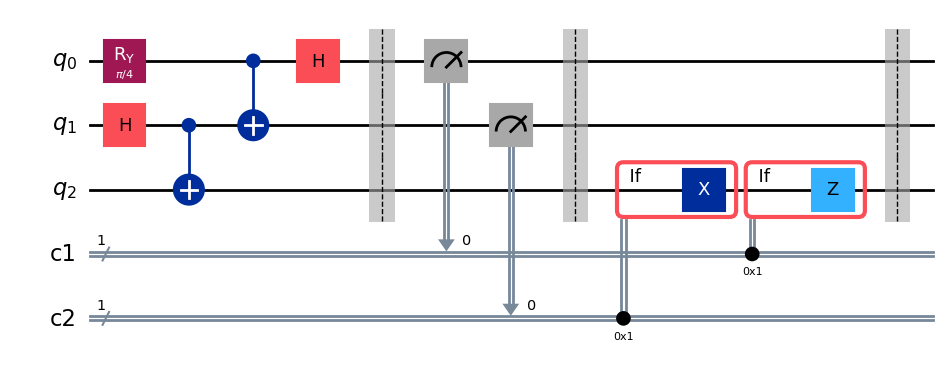

Statevector BEFORE teleportation:


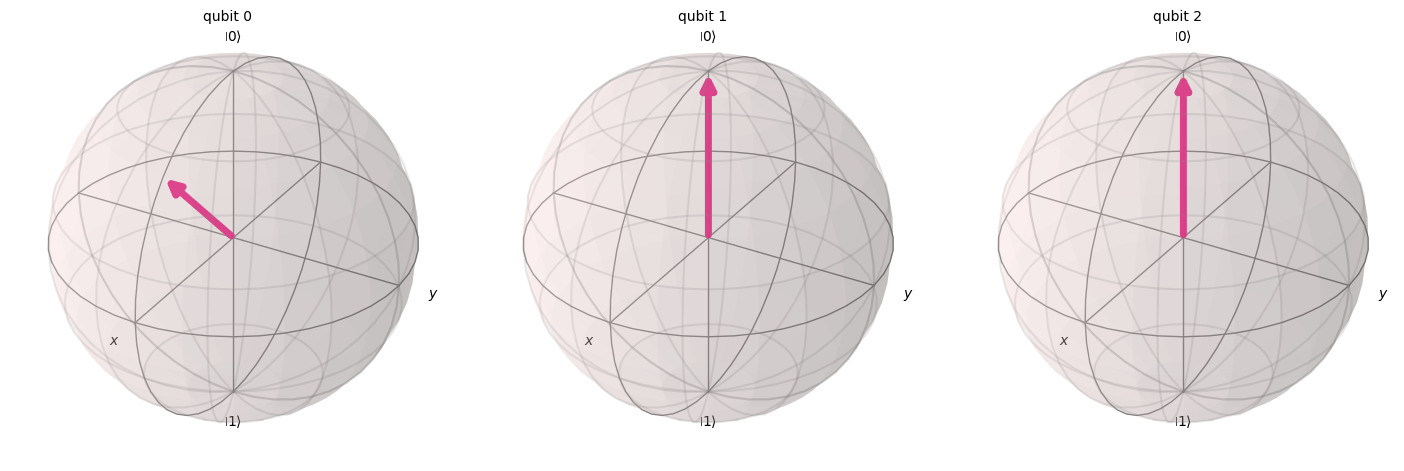

Statevector AFTER teleportation (before measuring q2):


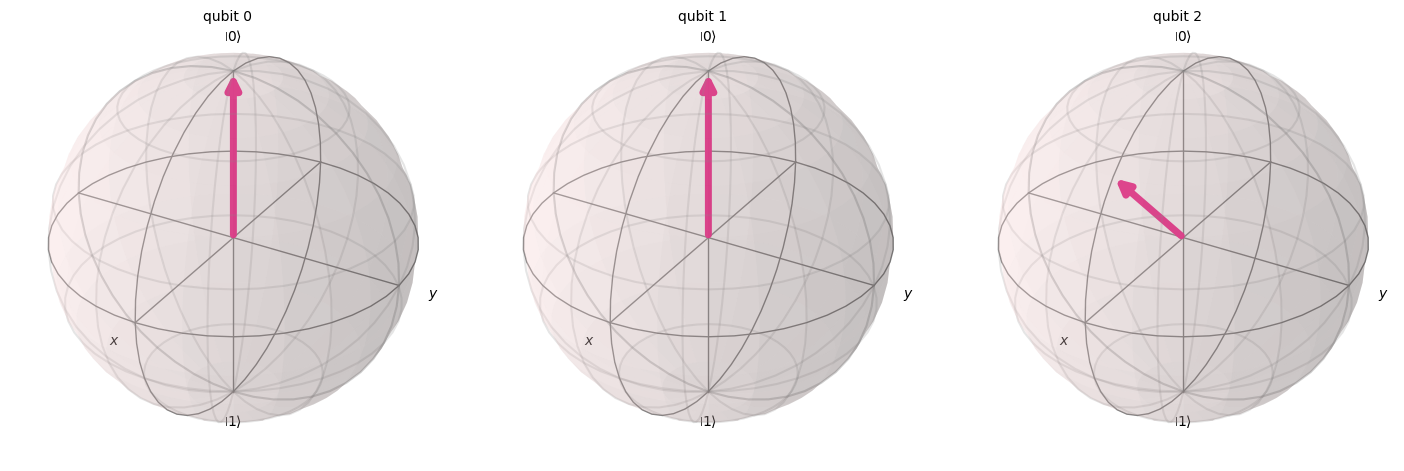


Quantum state probabilities BEFORE measurement:
|000> : 0.8536
|100> : 0.1464

Measurement results (q2): {'1 1': 83, '1 0': 73, '0 0': 444, '0 1': 424}


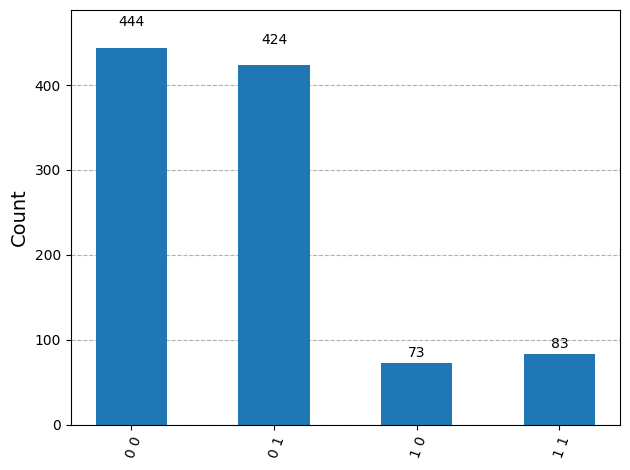


Measurement outcome probabilities from simulation:
Outcome 1 1: 0.0811
Outcome 1 0: 0.0713
Outcome 0 0: 0.4336
Outcome 0 1: 0.4141


In [ ]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit qiskit-aer matplotlib


# %matplotlib inline is for Jupyter/Colab
%matplotlib inline

# Imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, circuit_drawer
from qiskit.quantum_info import Statevector
from numpy import pi
import matplotlib.pyplot as plt
from IPython.display import display

# Step 1: Define Registers
q = QuantumRegister(3, "q")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c1, c2)

# Step 2: Prepare state to teleport (rotate qubit 0)
theta = pi / 4
qc.ry(theta, q[0])

# Step 3: Show state before teleportation (Bloch Sphere)
sim = AerSimulator()
before_qc = qc.copy()
before_qc.save_statevector()
state_before = sim.run(before_qc).result().get_statevector()

# Step 4: Create Bell pair
qc.h(q[1])
qc.cx(q[1], q[2])

# Step 5: Entangle the teleporting qubit
qc.cx(q[0], q[1])
qc.h(q[0])
qc.barrier()

# Step 6: Measure qubits 0 and 1
qc.measure(q[0], c1)
qc.measure(q[1], c2)
qc.barrier()

# Step 7: Conditional operations using if_test (Qiskit Terra 1.0+)
with qc.if_test((c2, 1)):
    qc.x(q[2])
with qc.if_test((c1, 1)):
    qc.z(q[2])
qc.barrier()

# Step 8: Show and save the circuit diagram
print("Quantum Teleportation Circuit:")
display(circuit_drawer(qc, output='mpl'))



print("Statevector BEFORE teleportation:")
display(plot_bloch_multivector(state_before))

# Step 7.5: View Bloch spheres after teleportation (before measuring q2)
bloch_qc = qc.copy()
bloch_qc.save_statevector()
state_after = sim.run(bloch_qc).result().get_statevector()

print("Statevector AFTER teleportation (before measuring q2):")
display(plot_bloch_multivector(state_after))


# Step 7.6: Print quantum state probabilities before measurement
statevector = Statevector(state_after)
probs = statevector.probabilities_dict()

print("\nQuantum state probabilities BEFORE measurement:")
for state, prob in probs.items():
    print(f"|{state}> : {prob:.4f}")

# Step 9: Final measurement of q[2] (teleported qubit)
qc.measure(q[2], c2)
result = sim.run(qc, shots=1024, seed_simulator=42).result()
counts = result.get_counts()
print("\nMeasurement results (q2):", counts)

# Step 10: Histogram of results
display(plot_histogram(counts))



# Step 11: Print measurement probabilities numerically
total_shots = sum(counts.values())
print("\nMeasurement outcome probabilities from simulation:")
for outcome, count in counts.items():
    probability = count / total_shots
    print(f"Outcome {outcome}: {probability:.4f}")
